## Tutorial 3: Linear filters on color images


In this tutorial, we will recall the concepts:

1. Visualization and rescaling of color images

2. Photometric & spatial image resolution of color images

3. Histogram  of color images

4. Convolution on color images

5. Image noise and color image smoothing

6. Gaussian filtering on color images: kernels with different sigma

7. Mean vs median color image filtering

8. Comparison on different filtering techniques on color images.


# Image quality of color images


## Spatial resolution of color images

Imagine that we are working on a marketing agency and we are asked given an image as on the left to create the following composed image. 

In [23]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='images/butterfly.jpg'></td><td><img src='images/composed_butterfly.png' style='width: 1300px;'></td></tr></table>"))

Implement a function to construct the composed image.

In [31]:
from skimage import io
from matplotlib import pyplot as plt
from skimage.color import rgba2rgb

#reading the image
bt=io.imread('images/butterfly.jpg')
print(bt.shape, bt.dtype)

(1280, 1280, 3) uint8


In [32]:
from skimage.transform import rescale

composed_im=bt.copy() # make a copy of the original image to keep as output
small_im=rescale(composed_im,0.5, multichannel=True) # construct the small image to embed
print(composed_im.shape, composed_im.dtype, composed_im.max())

(1280, 1280, 3) uint8 255


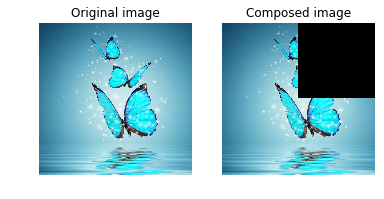

In [34]:
composed_im[:round(composed_im.shape[0]/2),round(composed_im.shape[1]/2):]=small_im[:,:,:]

#visualize
fig, ax = plt.subplots(1,2)
ax[0].imshow(bt)
ax[0].set_axis_off()
ax[0].set_title('Original image')
ax[1].imshow(composed_im)
ax[1].set_axis_off()
ax[1].set_title('Composed image')
plt.show()

Detect the problem?

Shape of new image:  (640, 640, 3) type:  float64 max value:  1.0
Shape of new image:  (320, 320, 3) type:  float64 max value:  0.9995439900366216
Shape of new image:  (160, 160, 3) type:  float64 max value:  0.9944243858493766
Shape of new image:  (80, 80, 3) type:  float64 max value:  0.9823771650294681
Shape of new image:  (40, 40, 3) type:  float64 max value:  0.9775321232213305
Shape of new image:  (20, 20, 3) type:  float64 max value:  0.971508671702627
Shape of new image:  (10, 10, 3) type:  float64 max value:  0.9429924634788724
Shape of new image:  (5, 5, 3) type:  float64 max value:  0.8621388631700355


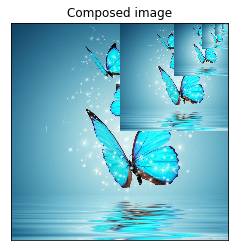

In [103]:
from skimage import img_as_float

im=bt.copy()
im=img_as_float(im)
im2=im
xb=0
yb=0
i=1
n=min(im.shape[0], im.shape[1])
while n>8:
    i+=1
    im2=rescale(im2,0.5, multichannel=True)
    print('Shape of new image: ', im2.shape, 'type: ',im2.dtype, 'max value: ', im2.max())
    x=round(im2.shape[0])
    y=yb+round(im2.shape[1])
    n=min(round(im2.shape[0]),round(im2.shape[1]))
    im[:x,y:]=im2[:,:,:]
    xb=x
    yb=y
    
#visualize it    
plt.imshow(im)
plt.xticks([])
plt.yticks([])
plt.title('Composed image')
plt.show()


* Exercise: Given the image pintalabios.jpg (on the left):

<table><tr><td><img src='images/pintalabios2.jpg'></td><td><img src='images/tinted_lips.png' style='width: 740px;'></td></tr></table>

obtain a gray image that only colors the lips and the nails in red.

([], <a list of 0 Text yticklabel objects>)

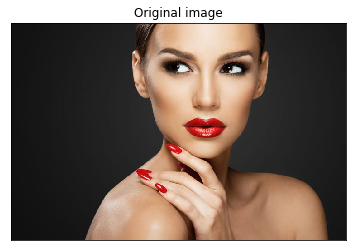

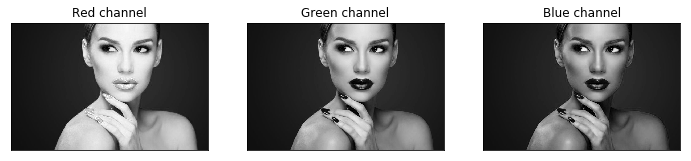

In [104]:
%matplotlib inline
pl=io.imread('images/pintalabios2.jpg')

#visualize it
plt.imshow(pl)
plt.xticks([])
plt.yticks([])
plt.title('Original image')
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(1,3,1)
plt.imshow(pl[:,:,0], cmap='gray')
plt.title('Red channel')
plt.xticks([])
plt.yticks([])
ax2=fig.add_subplot(1,3,2)
plt.imshow(pl[:,:,1], cmap='gray')
plt.title('Green channel')
plt.xticks([])
plt.yticks([])
ax3=fig.add_subplot(1,3,3)
plt.title('Blue channel')
plt.imshow(pl[:,:,2], cmap='gray')
plt.xticks([])
plt.yticks([])


In [105]:
%matplotlib inline

255 0 [201 156 125]


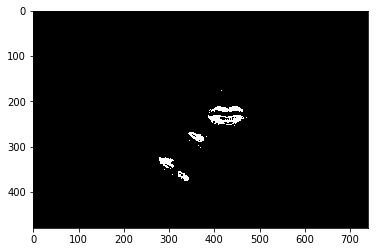

In [106]:
import numpy as np
from skimage.color import rgb2gray

im2=0*pl[:,:,0]
im2[np.logical_and(pl[:,:,0]>200, pl[:,:,1]<132, pl[:,:,2]<160)]=255
im2[np.logical_and(pl[:,:,0]>160, pl[:,:,1]<82, pl[:,:,2]<160)]=255

print (pl.max(), pl.min(), pl[400,600])
plt.imshow(im2, cmap='gray', vmin=0, vmax=1)
plt.show()

Max pixel value:  255


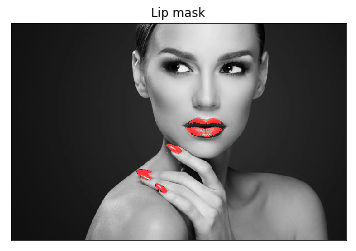

In [107]:
plgr=rgb2gray(pl)
plt.imshow(plgr, cmap='gray')

newim=np.zeros(pl.shape,dtype='uint8')
plred=pl[:,:,0]
lb=255*plgr
lb[(im2==255)]=plred[(im2==255)]
lb[(im2==255)]=255
plt.imshow(lb, cmap='gray')


newim[:,:,0]=lb
newim[:,:,1]=255*plgr
newim[:,:,2]=255*plgr

#visualize it
plt.imshow(newim)
plt.xticks([])
plt.yticks([])
plt.title('Lip mask')
print('Max pixel value: ', newim.max())

## Photometric resolution

Photometric resolution depends on the number of grey levels used per each channel.

Read the image rainfet.jpg and change its photometric resolution.

(400, 600, 3)


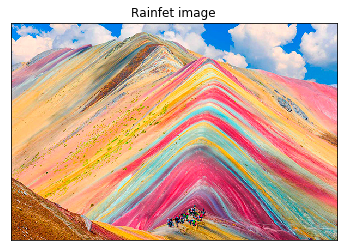

In [46]:
rf=io.imread('images/rainfet.jpg')
plt.imshow(rf)
plt.title('Rainfet image')
plt.xticks([])
plt.yticks([])
print(rf.shape)

Check what is the minimal acceptable photometric resolution?

(128,)


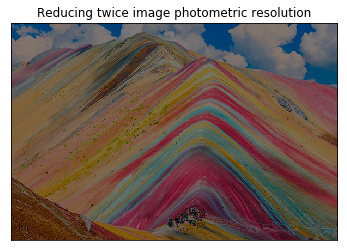

(64,)


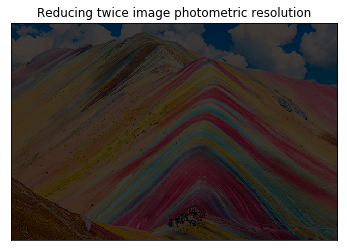

(32,)


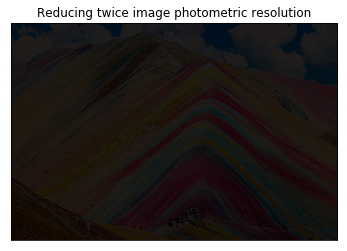

In [47]:
rf2=rf/2
rf2=rf2.astype('uint8')

plt.imshow(rf2)
plt.title('Reducing twice image photometric resolution')
plt.xticks([])
plt.yticks([])
print(np.unique(rf2).shape)
plt.show()

rf2=rf2/2
rf2=rf2.astype('uint8')

plt.imshow(rf2)
print(np.unique(rf2).shape)
plt.title('Reducing twice image photometric resolution')
plt.xticks([])
plt.yticks([])
plt.show()

rf2=rf2/2
rf2=rf2.astype('uint8')

plt.imshow(rf2)
plt.title('Reducing twice image photometric resolution')
plt.xticks([])
plt.yticks([])
print(np.unique(rf2).shape)
plt.show()



Additional material: [Tinting gray-scale images](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_tinting_grayscale_images.html#sphx-glr-auto-examples-color-exposure-plot-tinting-grayscale-images-py)
                            

## Histogram

Recall: a histogram defines the intensity statistics of an image.

*skimage.exposure.histogram(image, nbins=256, source_range='image', normalize=False)[source]*

Returns the histogram of an image.

This function returns the centers of bins and does not rebin integer arrays. For integer arrays, each integer value has its own bin, which improves speed and intensity-resolution.

In color images,the histogram is computed on the flattened image: 

**Note that for color images, the function should be used separately on each channel to obtain a histogram for each color channel.**

In [53]:
from skimage import exposure
from skimage import img_as_float

hst=exposure.histogram(img_as_float(rf))
print(hst[0], hst[1])

hstred=exposure.histogram(img_as_float(rf[:,:,0]))
hstgreen=exposure.histogram(img_as_float(rf[:,:,1]))
hstblue=exposure.histogram(img_as_float(rf[:,:,2]))




[10720  3179  1529   668   349   256   261   220   227   202   218   235
   266   258   254   256   290   287   296   304   326   316   275   341
   394   399   397   427   396   376   436   475   542   513   568   537
   559   533   514   581   585   629   640   698   697   744   668   541
   679   789   814   805   858   830   869   918   925   906   802   747
   926  1022   968  1100  1118  1134  1207  1190  1171  1226  1211  1175
  1061  1269  1394  1404  1431  1569  1609  1468  1562  1587  1613  1565
  1656  1706  1668  1581  1424  1639  1819  1873  1804  1947  1926  1892
  1916  1908  2024  2067  2014  2109  2137  2128  2111  2233  2398  2324
  2382  2342  2345  2239  2435  2624  2685  2791  2834  3040  2945  3021
  3511  3266  3310  3364  3672  3781  3448  3559  3658  3700  3677  3587
  3571  3572  3560  3543  3656  3635  3849  3718  3704  3902  3945  3961
  3980  4034  4003  3957  3839  3885  3822  3874  3849  4023  3805  3957
  4000  4007  4096  3903  3913  3975  3917  3885  3

/Users/petia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  after removing the cwd from sys.path.


<Container object of 256 artists>

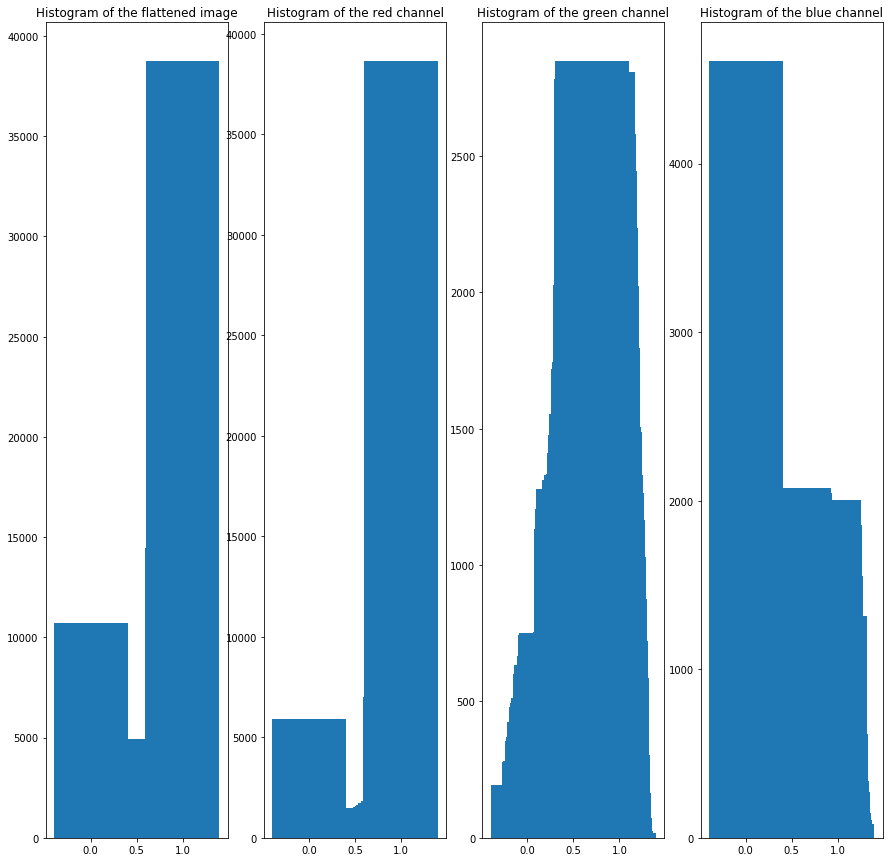

In [54]:
#Visualizing the histogram
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,4,1)
plt.bar(hst[1],hst[0])
plt.title('Histogram of the flattened image')
fig.add_subplot(1,4,2)
plt.bar(hstred[1],hstred[0])
plt.title('Histogram of the red channel')
fig.add_subplot(1,4,3)
plt.bar(hstgreen[1],hstgreen[0])
plt.title('Histogram of the green channel')
fig.add_subplot(1,4,4)
plt.title('Histogram of the blue channel')
plt.bar(hstblue[1],hstblue[0])


**Note: In order to apply properly the histogram function, it is recommended to transform the image to float**

### What are the bins in a histogram?

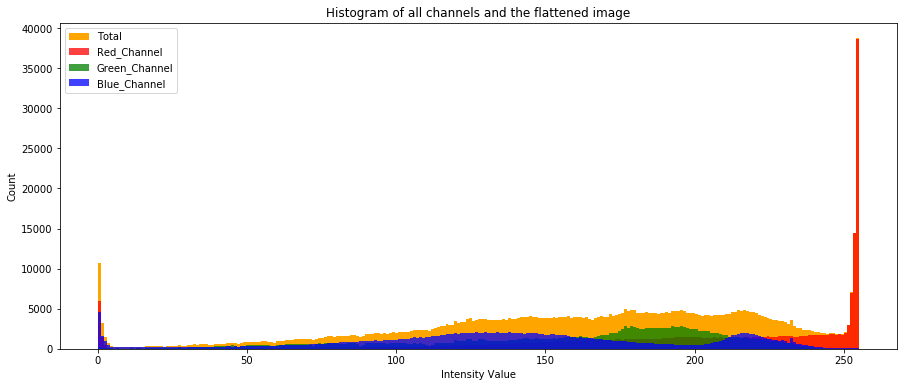

In [55]:
image=rf

#Visualizing  all bars in the same figure
plt.figure(figsize=(15,6))
plt.hist(image.ravel(), bins = 256, color = 'orange', )
plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.75)
plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.75)
plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.75)
plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.title('Histogram of all channels and the flattened image')
plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

What other way to visualize the histogram do you know?

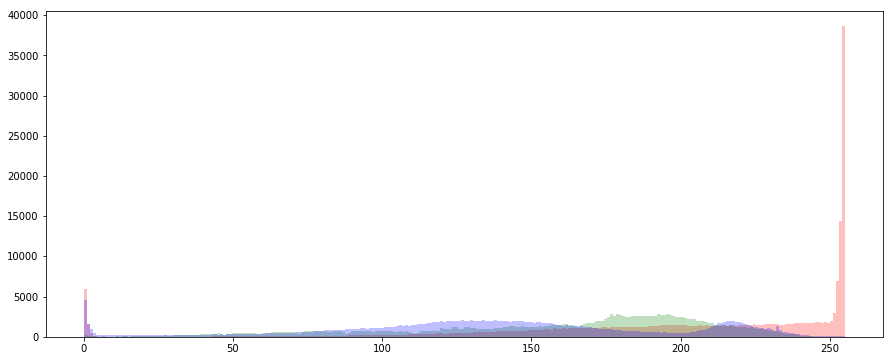

In [56]:
#Alternative visualization
fig=plt.figure(figsize=(15,6))
plt.hist(rf[:,:,0].ravel(), color = 'red', alpha = 0.25, bins=256)
plt.hist(rf[:,:,1].ravel(), color = 'green', alpha = 0.25, bins=256)
plt.hist(rf[:,:,2].ravel(), color = 'blue', alpha = 0.25, bins=256)
plt.show()

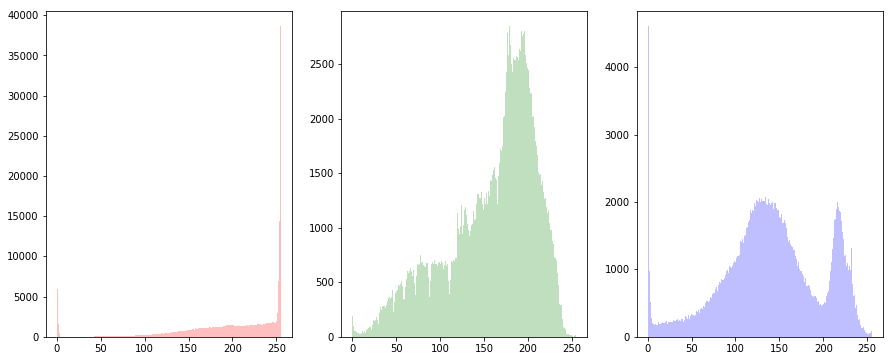

In [57]:
#Visualizing each channel separately
fig=plt.figure(figsize=(15,6))
fig.add_subplot(1,3,1)
plt.hist(rf[:,:,0].ravel(), color = 'red', alpha = 0.25, bins=256)
fig.add_subplot(1,3,2)
plt.hist(rf[:,:,1].ravel(), color = 'green', alpha = 0.25, bins=256)
fig.add_subplot(1,3,3)
plt.hist(rf[:,:,2].ravel(), color = 'blue', alpha = 0.25, bins=256)
plt.show()

## Histogram Equalization
This examples enhances an image with low contrast, using a method called histogram equalization, which “spreads out the most frequent intensity values” in an image 1. The equalized image has a roughly linear cumulative distribution function.

([], <a list of 0 Text yticklabel objects>)

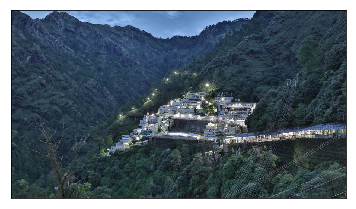

In [109]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()
img=io.imread('images/temple4.jpg')

#visualize it
plt.imshow(img)
plt.xticks([])
plt.yticks([])

In [110]:
# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

/Users/petia/anaconda3/lib/python3.6/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


/Users/petia/anaconda3/lib/python3.6/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


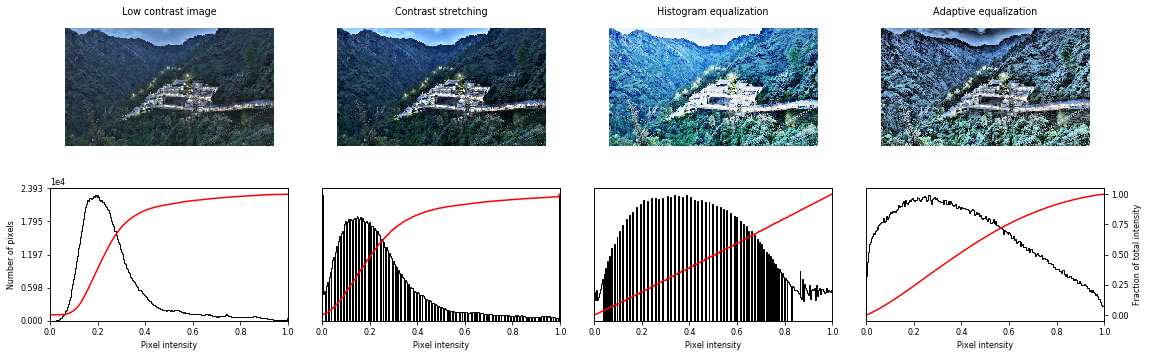

In [111]:
# Display results
fig = plt.figure(figsize=(16, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

While histogram equalization has the advantage that it requires no parameters, it sometimes yields unnatural looking images. An alternative method is contrast stretching, where the image is rescaled to include all intensities that fall within the 2nd and 98th percentiles 2.

1
https://en.wikipedia.org/wiki/Histogram_equalization

2
http://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm

## [Histogram matching](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_histogram_matching.html#sphx-glr-auto-examples-color-exposure-plot-histogram-matching-py)
This example demonstrates the feature of histogram matching. It manipulates the pixels of an input image so that its histogram matches the histogram of the reference image. If the images have multiple channels, the matching is done independently for each channel, as long as the number of channels is equal in the input image and the reference.

Histogram matching can be used as a lightweight normalisation for image processing, such as feature matching, especially in circumstances where the images have been taken from different sources or in different conditions (i.e. lighting).

In [112]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

reference = data.coffee()
image = data.chelsea()

matched = match_histograms(image, reference, multichannel=True)

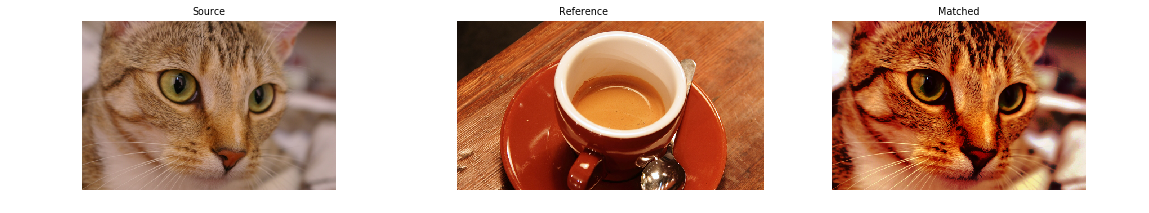

In [78]:
#visualize it
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

To illustrate the effect of the histogram matching, we plot for each RGB channel, the histogram and the cumulative histogram. Clearly, the matched image has the same cumulative histogram as the reference image for each channel.

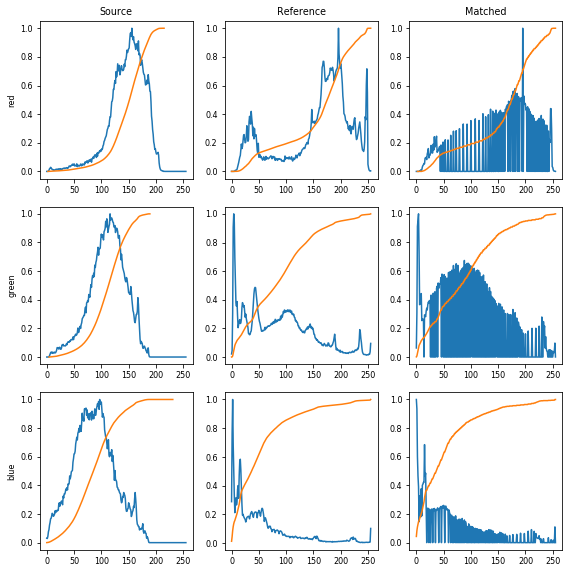

In [79]:
#visualize it
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))


for i, img in enumerate((image, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()

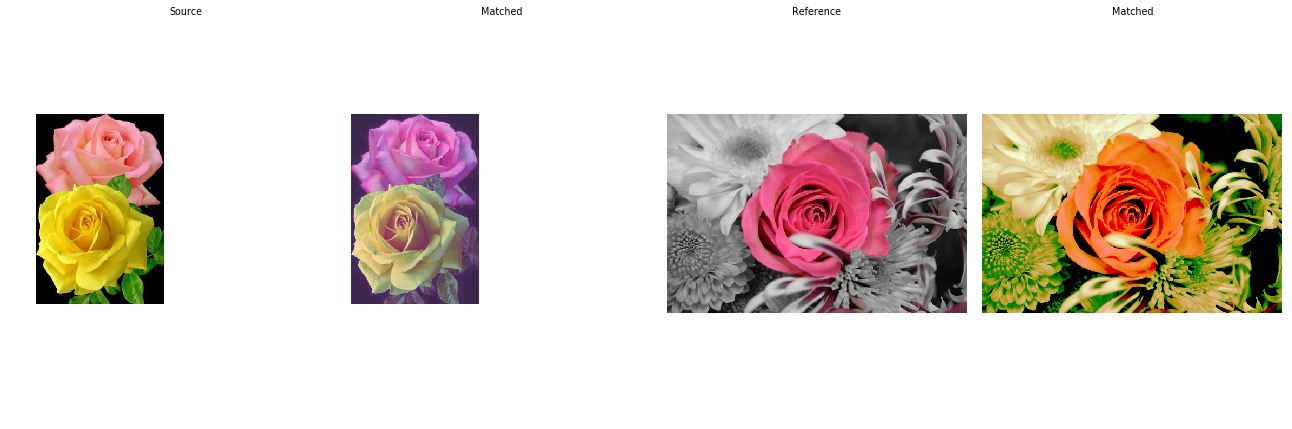

In [120]:
reference = io.imread('images/rose.jpg')
image = io.imread('images/2roses.jpg')

matched1 = match_histograms(image, reference, multichannel=True)
matched2 = match_histograms(reference, image, multichannel=True)


#visualize it
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(18, 6),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3, ax4):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(matched1)
ax2.set_title('Matched')
ax3.imshow(reference)
ax3.set_title('Reference')
ax4.imshow(matched2)
ax4.set_title('Matched')


plt.tight_layout()
plt.show()

#### Convolution

Let's smooth an image. For this purpose, use a convolution. 

Recall:

Each value in result is C_i = \sum_j{I_{i+j-k} W_j}, where W is the weights kernel, j is the n-D spatial index over W, I is the input and k is the coordinate of the center of W, specified by origin in the input parameters.


Multi-dimensional convolution:
*skimage.filter.edges.convolve(input, weights)*

What mask can we define?

In [128]:
from scipy import ndimage
mask=np.array([[[1,1,1,1,1]]])
mask=mask/np.sum(mask) #Why?
print(mask)

ht=io.imread('images/hobiton2.jpeg')
ht=rescale(ht,scale=.2, multichannel=True)
print(ht.shape)


[[[0.2 0.2 0.2 0.2 0.2]]]
(533, 800, 3)


In [129]:
ht_smooth=ndimage.convolve(ht, mask, mode='constant', cval=0.0)
print(ht_smooth.max(), ht_smooth.dtype)

0.56078431372549 float64


([], <a list of 0 Text yticklabel objects>)

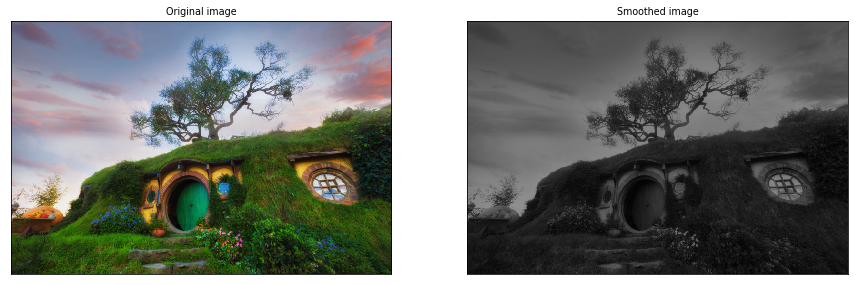

In [130]:
#visualize
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.imshow(ht)
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,2,2)
plt.imshow(ht_smooth)
plt.title('Smoothed image')
plt.xticks([])
plt.yticks([])

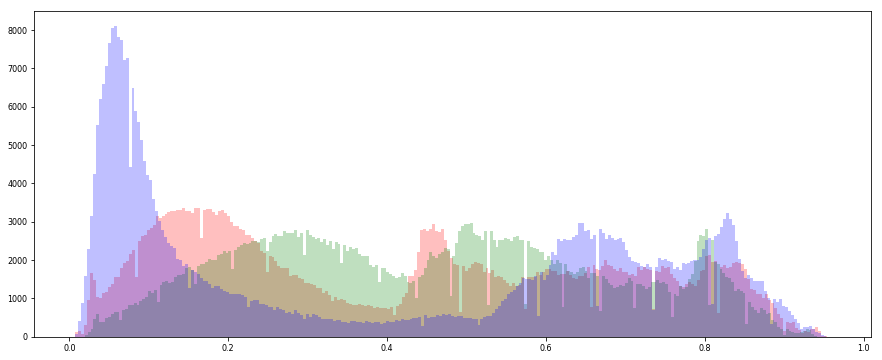

In [131]:
fig=plt.figure(figsize=(15,6))
plt.hist(ht[:,:,0].ravel(), color='red', bins=256, alpha=.25)
plt.hist(ht[:,:,1].ravel(), color='green', bins=256, alpha=.25)
plt.hist(ht[:,:,2].ravel(), color='blue', bins=256, alpha=.25)
plt.show()

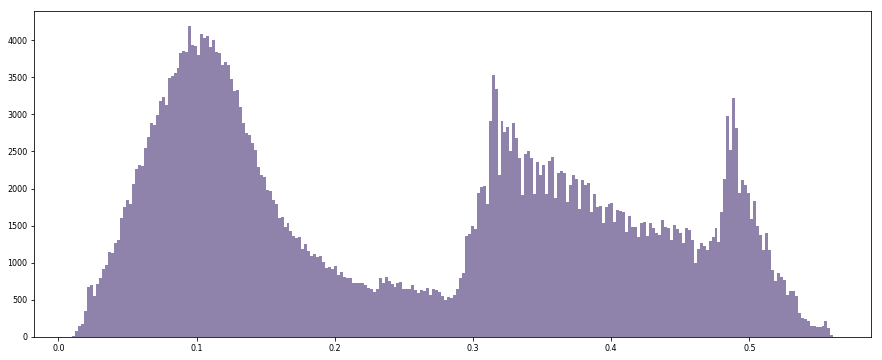

In [132]:
fig=plt.figure(figsize=(15,6))
plt.hist(ht_smooth[:,:,0].ravel(), color='red', bins=256, alpha=.25)
plt.hist(ht_smooth[:,:,1].ravel(), color='green', bins=256, alpha=.25)
plt.hist(ht_smooth[:,:,2].ravel(), color='blue', bins=256, alpha=.25)
plt.show()

In [138]:
from skimage.morphology import disk

mask=disk(9)
mask=mask/np.sum(mask) #Why?
ht_smooth_red=ndimage.convolve(ht[:,:,0], mask)
ht_smooth_green=ndimage.convolve(ht[:,:,1], mask)
ht_smooth_blue=ndimage.convolve(ht[:,:,2], mask)

In [139]:
ht_smooth=np.zeros(ht.shape)
ht_smooth[:,:,0]=ht_smooth_red
ht_smooth[:,:,1]=ht_smooth_green
ht_smooth[:,:,2]=ht_smooth_blue
print(ht_smooth.max(), ht.max())

0.9424293316315059 0.9616929698708738


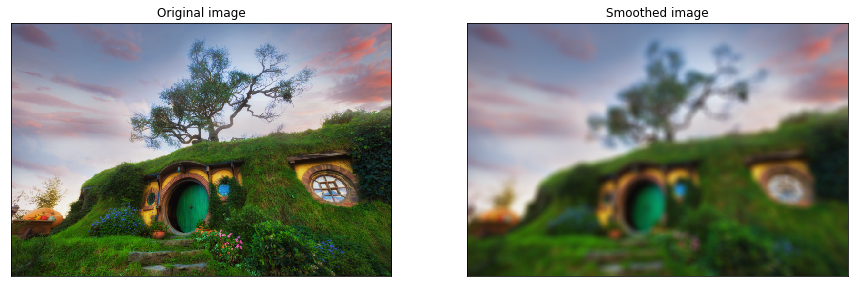

In [140]:
%matplotlib inline
fig=plt.figure(figsize=(15,7))
fig.add_subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.title('Original image')
plt.imshow(ht)
fig.add_subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.title('Smoothed image')
plt.imshow(ht_smooth)
plt.show()

Check the parameters of the command convolve and experiment with other values different from the optional ones.

Read the image "temple1.jpg" and smooth the spike structures. What mask shell we use?

(253, 450, 3)


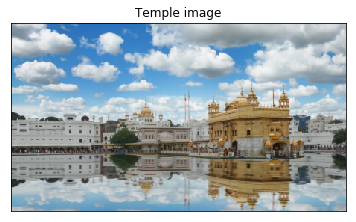

In [144]:
#Use non-uniform mask

%matplotlib inline
gr=io.imread('images/temple1.jpg')
gr=rescale(gr,0.5, multichannel=True)

#visualize it
plt.imshow(gr)
plt.xticks([])
plt.yticks([])
plt.title('Temple image')

print(gr.shape)

In [145]:
mask_non_uniform=np.array([[1,4,8,16,8,4,1]])
mask_non_uniform=mask_non_uniform/np.sum(mask_non_uniform)


In [146]:
grua_smooth_nu_red=ndimage.convolve(gr[:,:,0], mask_non_uniform, mode='constant', cval=0.0)
grua_smooth_nu_red=ndimage.convolve(grua_smooth_nu_red, mask_non_uniform, mode='constant', cval=0.0)

grua_smooth_nu_green=ndimage.convolve(gr[:,:,1], mask_non_uniform, mode='constant', cval=0.0)
grua_smooth_nu_green=ndimage.convolve(grua_smooth_nu_green, mask_non_uniform, mode='constant', cval=0.0)

grua_smooth_nu_blue=ndimage.convolve(gr[:,:,2], mask_non_uniform, mode='constant', cval=0.0)
grua_smooth_nu_blue=ndimage.convolve(grua_smooth_nu_blue, mask_non_uniform, mode='constant', cval=0.0)

grua_smooth=np.zeros(gr.shape)
grua_smooth[:,:,0]=grua_smooth_nu_red
grua_smooth[:,:,1]=grua_smooth_nu_green
grua_smooth[:,:,2]=grua_smooth_nu_blue

print(grua_smooth.min(), grua_smooth.max(), grua_smooth.dtype)

0.03898059223689475 0.96479202792228 float64


([], <a list of 0 Text yticklabel objects>)

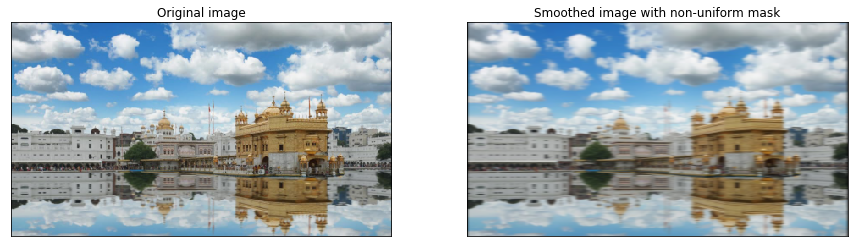

In [147]:
#visualize
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.imshow(gr)
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,2,2)
plt.imshow((255*grua_smooth).astype('uint8'))
plt.title('Smoothed image with non-uniform mask')
plt.xticks([])
plt.yticks([])

How to apply a function to all channels simultaneously?

In [148]:
from skimage.color.adapt_rgb import adapt_rgb, each_channel

@adapt_rgb(each_channel)
def convolve_each(image, mask):
    return ndimage.convolve(image, mask, mode='constant', cval=0.0)


gr=io.imread('images/gruas.jpg')
gr=rescale(gr,0.5, multichannel=True)

gr_conv=convolve_each(gr,mask_non_uniform)
print(gr_conv.shape, gr_conv.dtype, gr_conv.max())

(244, 425, 3) float64 0.9586367880485529


([], <a list of 0 Text yticklabel objects>)

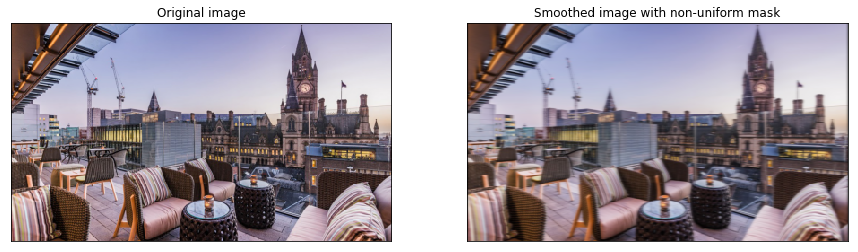

In [149]:
#visualize
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.imshow(gr)
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,2,2)
plt.imshow((255*gr_conv).astype('uint8'))
plt.title('Smoothed image with non-uniform mask')
plt.xticks([])
plt.yticks([])

More material: [Adapting gray-scale filters to RGB images](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_adapt_rgb.html#sphx-glr-auto-examples-color-exposure-plot-adapt-rgb-py)
    

## Noise

What kind of image noise do you know?



([], <a list of 0 Text yticklabel objects>)

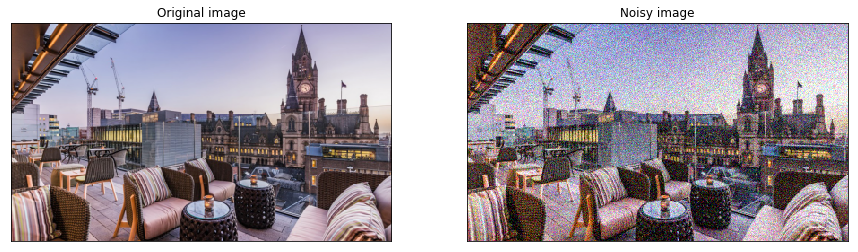

In [150]:
from skimage import util

gr_noisy=util.random_noise(gr, mean=0, var=0.01) #Generates Gaussian noise

#Visualize it
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.imshow(gr, cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,2,2)
plt.imshow(gr_noisy, cmap='gray')
plt.title('Noisy image')
plt.xticks([])
plt.yticks([])


In [151]:
mask=disk(2)
mask=mask/mask.sum()
print(mask.sum())
print(mask)
print(mask_non_uniform)

1.0
[[0.         0.         0.07692308 0.         0.        ]
 [0.         0.07692308 0.07692308 0.07692308 0.        ]
 [0.07692308 0.07692308 0.07692308 0.07692308 0.07692308]
 [0.         0.07692308 0.07692308 0.07692308 0.        ]
 [0.         0.         0.07692308 0.         0.        ]]
[[0.02380952 0.0952381  0.19047619 0.38095238 0.19047619 0.0952381
  0.02380952]]


Smooth the noisy image

0.9797179486913479 0.9976842582410872


([], <a list of 0 Text yticklabel objects>)

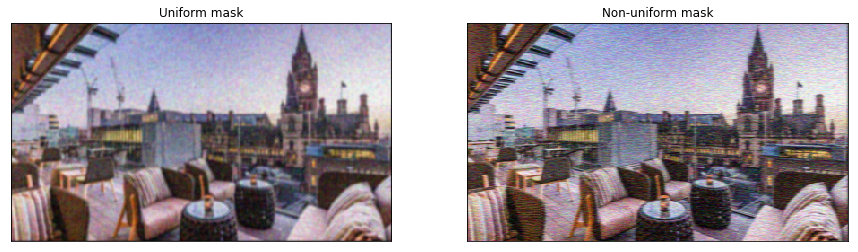

In [153]:
gr_noisy_smooth=convolve_each(gr_noisy, mask)
gr_noisy_smooth_nonuniform=convolve_each(gr_noisy, mask_non_uniform)
print(gr_noisy_smooth.max(), gr_noisy_smooth_nonuniform.max())

#visualize it
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.imshow(gr_noisy_smooth)
plt.title('Uniform mask')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,2,2)
plt.imshow(gr_noisy_smooth_nonuniform)
plt.title('Non-uniform mask')
plt.xticks([])
plt.yticks([])


## Gaussian filter

The multi-dimensional Gaussian filter function is:

skimage.filters.gaussian(image, sigma=1, output=None, mode='nearest', cval=0, multichannel=None, preserve_range=False, truncate=4.0)[source]


This function is a wrapper around scipy.ndi.gaussian_filter().

Integer arrays are converted to float.

The output should be floating point data type since gaussian converts to float provided image. If output is not provided, another array will be allocated and returned as the result.

The multi-dimensional filter is implemented as a sequence of one-dimensional convolution filters. The intermediate arrays are stored in the same data type as the output. Therefore, for output types with a limited precision, the results may be imprecise because intermediate results may be stored with insufficient precision.

([], <a list of 0 Text yticklabel objects>)

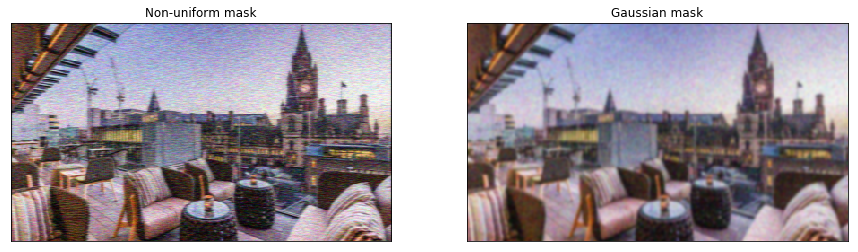

In [154]:
from skimage import filters

@adapt_rgb(each_channel)
def gaussian_each(image, sigma):
    return filters.gaussian(image, sigma)

gr_noisy_gaussian=gaussian_each(gr_noisy, sigma=1.5)

#visualize it
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.imshow(gr_noisy_smooth_nonuniform, cmap='gray')
plt.title('Non-uniform mask')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,2,2)
plt.imshow(gr_noisy_gaussian, cmap='gray')
plt.title('Gaussian mask')
plt.xticks([])
plt.yticks([])




Check the effect of different sigma parameters?

([], <a list of 0 Text yticklabel objects>)

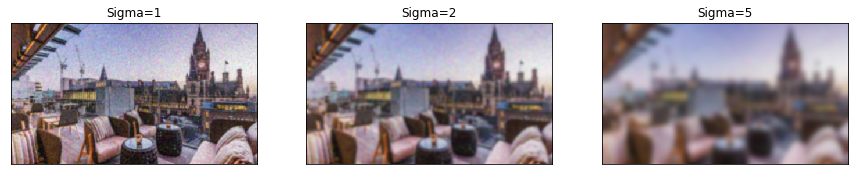

In [155]:
gr_noisy_gaussian1=gaussian_each(gr_noisy, sigma=1)
gr_noisy_gaussian2=gaussian_each(gr_noisy, sigma=2)
gr_noisy_gaussian5=gaussian_each(gr_noisy, sigma=5)


fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,3,1)
plt.imshow(gr_noisy_gaussian1, cmap='gray')
plt.title('Sigma=1')
plt.xticks([])
plt.yticks([])
fig.add_subplot(1,3,2)
plt.imshow(gr_noisy_gaussian2, cmap='gray')
plt.title('Sigma=2')
plt.xticks([])
plt.yticks([])
fig.add_subplot(1,3,3)
plt.imshow(gr_noisy_gaussian5, cmap='gray')
plt.title('Sigma=5')
plt.xticks([])
plt.yticks([])


## Median filter

In [156]:
from skimage.filters import median

@adapt_rgb(each_channel)
def median_each(im, size):
    return median(im, disk(size))

gr_noisy_median=median_each(gr_noisy,3)

Text(0.5,1,'Median filtering')

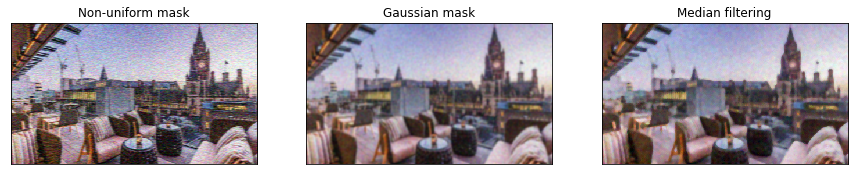

In [157]:
#visualize it
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,3,1)
plt.imshow(gr_noisy_smooth_nonuniform, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Non-uniform mask')
fig.add_subplot(1,3,2)
plt.imshow(gr_noisy_gaussian, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Gaussian mask')
fig.add_subplot(1,3,3)
plt.imshow(gr_noisy_median, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Median filtering')

How is the median and mean filter affecting the **salt&paper** noisy images?

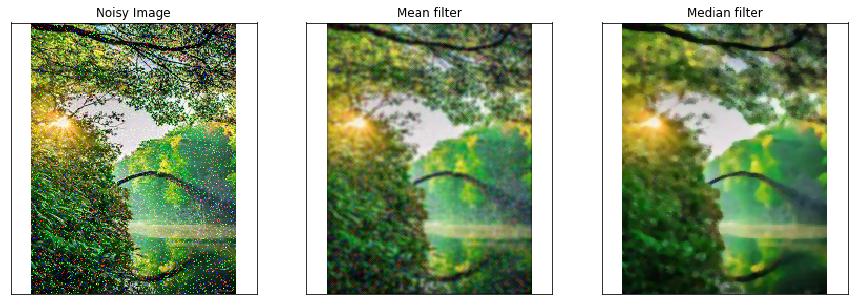

In [158]:
#introducing impulse noise

im=io.imread('images/nature.jpeg')

im_noisy_sp=util.random_noise(im,mode='salt')

im_noisy_mean=convolve_each(im_noisy_sp, mask)
im_noisy_median=median_each(im_noisy_sp, 3)


fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5))

for ax, img, title in zip(
        axes,
        [im_noisy_sp, im_noisy_mean, im_noisy_median],
        ['Noisy Image', 'Mean filter', 'Median filter']
):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.set_yticks([])
    ax.set_xticks([])

plt.show()

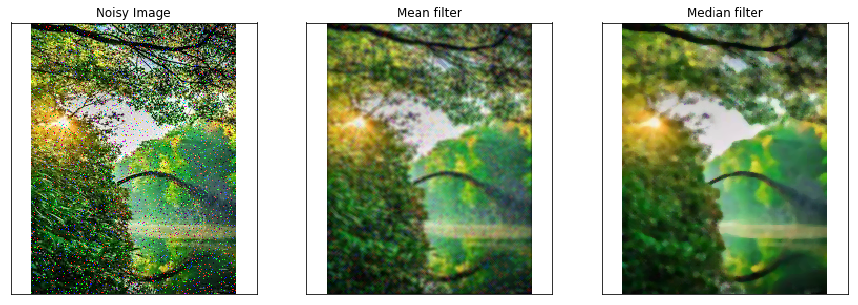

In [159]:
#introducing salt and paper noise
im_noisy_sp=util.random_noise(im,mode='s&p')

im_noisy_mean=convolve_each(im_noisy_sp, mask)
im_noisy_median=median_each(im_noisy_sp, 3)
im_noisy_gaussian=gaussian_each(im_noisy_sp, 2)


#visualize it
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5))

for ax, img, title in zip(
        axes,
        [im_noisy_sp, im_noisy_mean, im_noisy_median],
        ['Noisy Image', 'Mean filter', 'Median filter']
):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.set_yticks([])
    ax.set_xticks([])

plt.show()

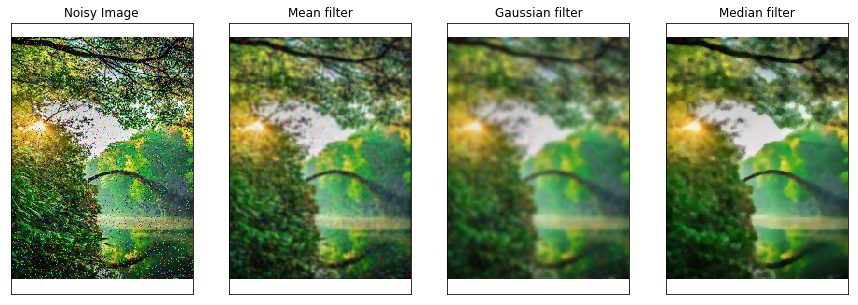

In [160]:
#Comparing mean, Gaussian and median filters

fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(15, 5))

for ax, img, title in zip(
        axes,
        [im_noisy_sp, im_noisy_mean, im_noisy_gaussian, im_noisy_median],
        ['Noisy Image', 'Mean filter', 'Gaussian filter', 'Median filter']
):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.set_yticks([])
    ax.set_xticks([])

plt.show()